In [1]:
import numpy as np

In [9]:
def load_data(data_path, data_length):
    with open (data_path, "r") as f:
        data = f.read()
    int_data = [float(i) for i in data.split(" ") if len(i) > 0]
    data = []
    for i in range(0, len(int_data), data_length):
        data.append(int_data[i:(i+data_length)])
    return np.array(data)

In [3]:
X_train = load_data("data/train_data.txt", 1024)
X_valid = load_data("data/valid_data.txt", 1024)
X_test = load_data("data/test_data.txt", 1024)

y_train = load_data("data/train_label.txt", 10)
y_valid = load_data("data/valid_label.txt", 10)
y_test = load_data("data/test_label.txt", 10)

In [4]:
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint

In [5]:
model = Sequential()

model.add(Input(shape=X_train.shape[1:]))

model.add(Dense(512, activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['acc'])

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=10,
#                         class_weight=class_weights,
                    validation_data=(X_valid, y_valid),
                    shuffle=True,
                   callbacks=[
                                   ModelCheckpoint(
                            'check_points/{val_loss:05f}.hdf5',
                                   monitor='val_loss', save_best_only=True)])

Epoch 1/10
61/61 [==============================] - 0s 4ms/step - loss: 1.7577 - acc: 0.5124 - val_loss: 1.1640 - val_acc: 0.7980
Epoch 2/10
61/61 [==============================] - 0s 2ms/step - loss: 0.7791 - acc: 0.8893 - val_loss: 0.5445 - val_acc: 0.8960
Epoch 3/10
61/61 [==============================] - 0s 2ms/step - loss: 0.4114 - acc: 0.9255 - val_loss: 0.3469 - val_acc: 0.9280
Epoch 4/10
61/61 [==============================] - 0s 2ms/step - loss: 0.2851 - acc: 0.9473 - val_loss: 0.2721 - val_acc: 0.9340
Epoch 5/10
61/61 [==============================] - 0s 2ms/step - loss: 0.2197 - acc: 0.9524 - val_loss: 0.2210 - val_acc: 0.9440
Epoch 6/10
61/61 [==============================] - 0s 2ms/step - loss: 0.1832 - acc: 0.9560 - val_loss: 0.1867 - val_acc: 0.9440
Epoch 7/10
61/61 [==============================] - 0s 2ms/step - loss: 0.1548 - acc: 0.9659 - val_loss: 0.1731 - val_acc: 0.9560
Epoch 8/10
61/61 [==============================] - 0s 2ms/step - loss: 0.1391 - acc: 0.96

In [13]:
# import matplotlib
from sklearn.metrics import classification_report, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
# matplotlib.rcParams.update({'font.size': 22})

model = load_model("check_points/0.130225.hdf5")
y_pred = model.predict_classes(X_test)
y_true = np.argmax(y_test, axis=1)
labels = [str(i) for i in range(10)]
print(classification_report(y_true, y_pred))
plt.rcParams["figure.figsize"] = (10, 20)
fig, ax = plot_confusion_matrix(confusion_matrix(y_true, y_pred),
                      show_normed=True,
                      show_absolute=True,
                      class_names=labels,
#                       fontsize=15
                      
                     )
plt.show()

/home/long/miniconda3/envs/datamining/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


ValueError: in user code:

    /home/long/miniconda3/envs/datamining/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1569 predict_function  *
        return step_function(self, iterator)
    /home/long/miniconda3/envs/datamining/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1559 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/long/miniconda3/envs/datamining/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/long/miniconda3/envs/datamining/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/long/miniconda3/envs/datamining/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/long/miniconda3/envs/datamining/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1552 run_step  **
        outputs = model.predict_step(data)
    /home/long/miniconda3/envs/datamining/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1525 predict_step
        return self(x, training=False)
    /home/long/miniconda3/envs/datamining/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/long/miniconda3/envs/datamining/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:255 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 1024 but received input with shape (32, 16)


# Letter

In [10]:
X_train = load_data("data/letter_train_data.txt", 16)
X_valid = load_data("data/letter_valid_data.txt", 16)
X_test = load_data("data/letter_test_data.txt", 16)

y_train = load_data("data/letter_train_label.txt", 26)
y_valid = load_data("data/letter_valid_label.txt", 26)
y_test = load_data("data/letter_test_label.txt", 26)

In [12]:
model = Sequential()

model.add(Input(shape=X_train.shape[1:]))

model.add(Dense(512, activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(26, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['acc'])

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=10,
#                         class_weight=class_weights,
                    validation_data=(X_valid, y_valid),
                    shuffle=True,
                   callbacks=[
                                   ModelCheckpoint(
                            'check_points/letter_{val_loss:05f}.hdf5',
                                   monitor='val_loss', save_best_only=True)])

Epoch 1/10
375/375 [==============================] - 1s 1ms/step - loss: 2.6309 - acc: 0.2530 - val_loss: 1.8704 - val_acc: 0.4945
Epoch 2/10
375/375 [==============================] - 0s 905us/step - loss: 1.5500 - acc: 0.5588 - val_loss: 1.3320 - val_acc: 0.6087
Epoch 3/10
375/375 [==============================] - 0s 969us/step - loss: 1.1891 - acc: 0.6630 - val_loss: 1.1157 - val_acc: 0.6848
Epoch 4/10
375/375 [==============================] - 0s 929us/step - loss: 1.0283 - acc: 0.7042 - val_loss: 0.9316 - val_acc: 0.7387
Epoch 5/10
375/375 [==============================] - 0s 900us/step - loss: 0.9190 - acc: 0.7388 - val_loss: 0.9117 - val_acc: 0.7343
Epoch 6/10
375/375 [==============================] - 0s 918us/step - loss: 0.8349 - acc: 0.7609 - val_loss: 0.7880 - val_acc: 0.7793
Epoch 7/10
375/375 [==============================] - 0s 904us/step - loss: 0.7699 - acc: 0.7778 - val_loss: 0.7186 - val_acc: 0.8023
Epoch 8/10
375/375 [==============================] - 0s 897us/s

/home/long/miniconda3/envs/datamining/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.93      0.91      0.92       151
           1       0.87      0.68      0.76       144
           2       0.91      0.69      0.79       167
           3       0.84      0.80      0.82       160
           4       0.66      0.79      0.72       147
           5       0.82      0.76      0.79       165
           6       0.60      0.86      0.71       155
           7       0.65      0.64      0.64       141
           8       0.93      0.78      0.85       151
           9       0.96      0.84      0.90       154
          10       0.66      0.87      0.75       149
          11       0.83      0.90      0.87       161
          12       0.81      0.97      0.88       148
          13       0.90      0.83      0.87       160
          14       0.94      0.72      0.81       140
          15       0.98      0.74      0.84       161
          16       0.89      0.79      0.84       165
          17       0.75    

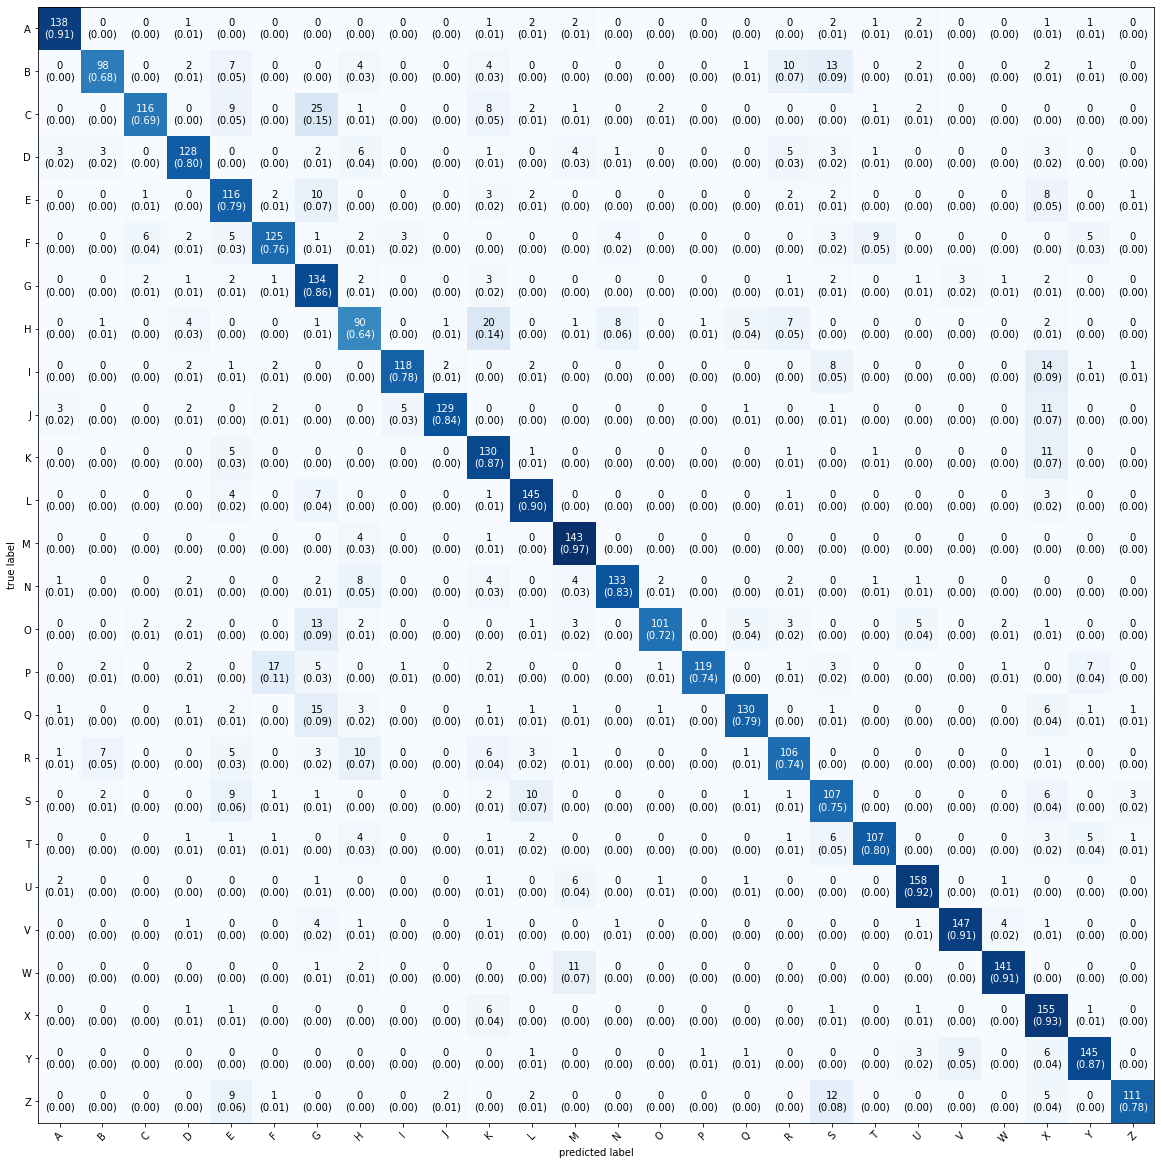

In [16]:
# import matplotlib
from sklearn.metrics import classification_report, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
# matplotlib.rcParams.update({'font.size': 22})

model = load_model("check_points/letter_0.653771.hdf5")
y_pred = model.predict_classes(X_test)
y_true = np.argmax(y_test, axis=1)
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
print(classification_report(y_true, y_pred))
plt.rcParams["figure.figsize"] = (20, 40)
fig, ax = plot_confusion_matrix(confusion_matrix(y_true, y_pred),
                      show_normed=True,
                      show_absolute=True,
                      class_names=labels,
#                       fontsize=15
                      
                     )
plt.show()

# Spam

In [17]:
X_train = load_data("data/spam_train_data.txt", 57)
X_valid = load_data("data/spam_valid_data.txt", 57)
X_test = load_data("data/spam_test_data.txt", 57)

y_train = load_data("data/spam_train_label.txt", 2)
y_valid = load_data("data/spam_valid_label.txt", 2)
y_test = load_data("data/spam_test_label.txt", 2)

In [20]:
model = Sequential()

model.add(Input(shape=X_train.shape[1:]))

model.add(Dense(512, activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['acc'])

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=10,
#                         class_weight=class_weights,
                    validation_data=(X_valid, y_valid),
                    shuffle=True,
                   callbacks=[
                                   ModelCheckpoint(
                            'check_points/spam_{val_loss:05f}.hdf5',
                                   monitor='val_loss', save_best_only=True)])

Epoch 1/10
87/87 [==============================] - 0s 2ms/step - loss: 7.3571 - acc: 0.6779 - val_loss: 0.6319 - val_acc: 0.6533
Epoch 2/10
87/87 [==============================] - 0s 1ms/step - loss: 0.6200 - acc: 0.6975 - val_loss: 0.5933 - val_acc: 0.7207
Epoch 3/10
87/87 [==============================] - 0s 1ms/step - loss: 0.6076 - acc: 0.6862 - val_loss: 0.6170 - val_acc: 0.6652
Epoch 4/10
87/87 [==============================] - 0s 1ms/step - loss: 0.6000 - acc: 0.6920 - val_loss: 0.5700 - val_acc: 0.7207
Epoch 5/10
87/87 [==============================] - 0s 1ms/step - loss: 0.5904 - acc: 0.6931 - val_loss: 0.5859 - val_acc: 0.6739
Epoch 6/10
87/87 [==============================] - 0s 1ms/step - loss: 0.5936 - acc: 0.6967 - val_loss: 0.5653 - val_acc: 0.7152
Epoch 7/10
87/87 [==============================] - 0s 1ms/step - loss: 0.5739 - acc: 0.7112 - val_loss: 0.6031 - val_acc: 0.6489
Epoch 8/10
87/87 [==============================] - 0s 1ms/step - loss: 0.5729 - acc: 0.70

              precision    recall  f1-score   support

           0       0.74      0.91      0.82       563
           1       0.78      0.49      0.60       358

    accuracy                           0.75       921
   macro avg       0.76      0.70      0.71       921
weighted avg       0.75      0.75      0.73       921



/home/long/miniconda3/envs/datamining/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


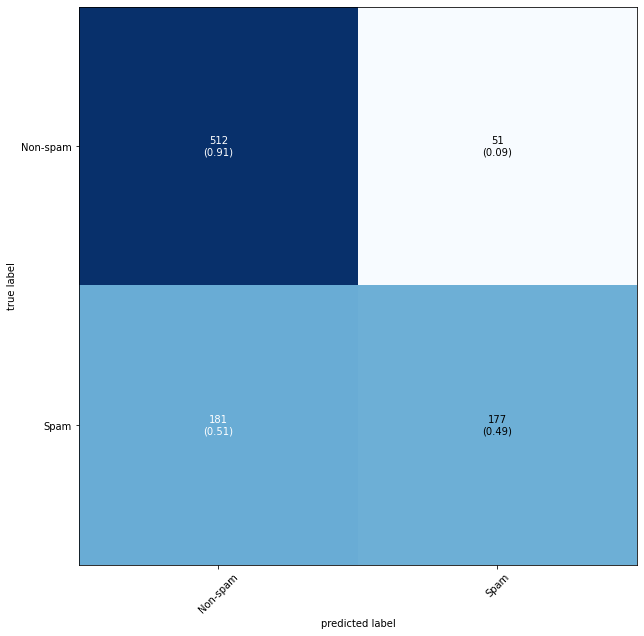

In [21]:
# import matplotlib
from sklearn.metrics import classification_report, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
# matplotlib.rcParams.update({'font.size': 22})

model = load_model("check_points/spam_0.550915.hdf5")
y_pred = model.predict_classes(X_test)
y_true = np.argmax(y_test, axis=1)
labels = ['Non-spam', 'Spam']
print(classification_report(y_true, y_pred))
plt.rcParams["figure.figsize"] = (10, 20)
fig, ax = plot_confusion_matrix(confusion_matrix(y_true, y_pred),
                      show_normed=True,
                      show_absolute=True,
                      class_names=labels,
#                       fontsize=15
                      
                     )
plt.show()